In [1]:
import numpy as np
import os 
from tqdm import tqdm 
from torchvision.transforms.functional import rgb_to_grayscale
import skimage
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import cv2 
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2
import plotly.express as px
from bcss_dataset_preprocess import mergeClass, cropROI, splitImg
from skimage.filters.rank import majority, median
from skimage.morphology import disk

In [3]:
origin_dir = '../dataset2d/BCSS/'
imgs_dir = os.path.join(origin_dir, 'images/')
segs_dir = os.path.join(origin_dir, 'masks/')
imgs = []
segs = []

nms = sorted(['.'.join(nm.split('.')[:-1]) for nm in os.listdir(imgs_dir)])

for nm in nms:
    img_path = os.path.join(imgs_dir, nm + '.png')
    seg_path = os.path.join(segs_dir, nm + '.png')

    if os.path.isfile(img_path) & os.path.isfile(seg_path):
        imgs.append(img_path)
        segs.append(seg_path)

files = [{"image": img, "label": seg} for img, seg in zip(imgs, segs)]

In [4]:
labels = []
labels_filt = []
for idx, sample in tqdm(enumerate(files), total=len(files)):
    img_path = sample['image']
    label_path = sample['label']
    img = Image.open(img_path)
    label = Image.open(label_path)

    img = np.array(img)
    label = np.array(label)

    if len(img.shape) == 2:
        img = skimage.color.gray2rgb(img)
        print('gray image : ', img_path)
    
    if (len(img.shape) == 3) & (img.shape[-1] == 4):
        img = skimage.color.rgba2rgb(img)
        img = (img * 255).astype(np.uint8)
        print("rgba image : ", img_path)

    if 0 in np.unique(label):
        img, label = cropROI(img, label)
        img = img[5:-5,5:-5]
        label = label[5:-5,5:-5]

        labels.append(label)
        # labels_filt.append(label_filt)
    # else:
    #     label = mergeClass(label)

100%|██████████| 151/151 [02:32<00:00,  1.01s/it]


In [15]:
# label_ = majority(label, disk(5))

In [23]:
# px.imshow(labels[idx])

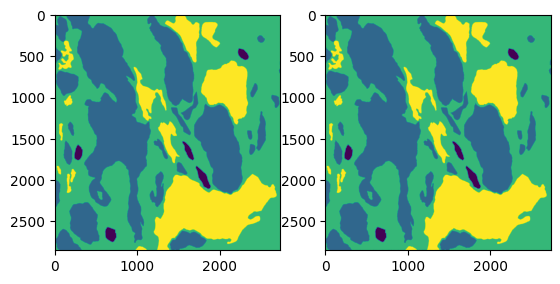

In [16]:
plt.subplot(121)
plt.imshow(label_)
plt.subplot(122)
plt.imshow(label)

In [9]:
# px.imshow(label)

In [5]:
# fg = (label > 0).astype(np.uint8) * 255
# cnt, _ = cv2.findContours(fg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# rect = cv2.minAreaRect(cnt[0])
# pts2 = cv2.boxPoints(rect)
# H, W = rect[1]
# H, W = int(H), int(W)
# pts1 = np.float32([[0,0],[H,0],[H,W],[0,W]])
# M = cv2.getPerspectiveTransform(pts2,pts1)
# label_out = cv2.warpPerspective(label,M,(H,W), flags=cv2.INTER_NEAREST)
# label_out = mergeClass(label_out)
# img_out = cv2.warpPerspective(img,M,(H,W))

In [6]:
out_dir = '/dataset/BCSS/'
imgs_dir = os.path.join(out_dir, 'images/')
segs_dir = os.path.join(out_dir, 'masks/')
imgs = []
segs = []

nms = sorted(['.'.join(nm.split('.')[:-1]) for nm in os.listdir(imgs_dir)])

for nm in nms:
    img_path = os.path.join(imgs_dir, nm + '.png')
    seg_path = os.path.join(segs_dir, nm + '.png')

    if os.path.isfile(img_path) & os.path.isfile(seg_path):
        imgs.append(img_path)
        segs.append(seg_path)

files = [{"image": img, "label": seg} for img, seg in zip(imgs, segs)]

In [7]:
shapes = []
for idx, sample in tqdm(enumerate(files), total=len(files)):
    img_path = sample['image']
    label_path = sample['label']
    img = Image.open(img_path)
    label = Image.open(label_path)

    img = np.array(img)
    label = np.array(label)

    nm_base = img_path.split('/')[-1].split('.')[0]
    tile_imgs, tile_labels = splitImg(img, label, tile=1024, stride=512)
    break 

  0%|          | 0/151 [00:00<?, ?it/s]

y:0-1024 x:0-1024
y:512-1536 x:0-1024
y:1024-2048 x:0-1024
y:1443-2467 x:0-1024
y:0-1024 x:512-1536
y:512-1536 x:512-1536
y:1024-2048 x:512-1536
y:1443-2467 x:512-1536
y:0-1024 x:1024-2048
y:512-1536 x:1024-2048
y:1024-2048 x:1024-2048
y:1443-2467 x:1024-2048
y:0-1024 x:1536-2560
y:512-1536 x:1536-2560
y:1024-2048 x:1536-2560
y:1443-2467 x:1536-2560
y:0-1024 x:2048-3072
y:512-1536 x:2048-3072
y:1024-2048 x:2048-3072
y:1443-2467 x:2048-3072
y:0-1024 x:2370-3394
y:512-1536 x:2370-3394
y:1024-2048 x:2370-3394
y:1443-2467 x:2370-3394


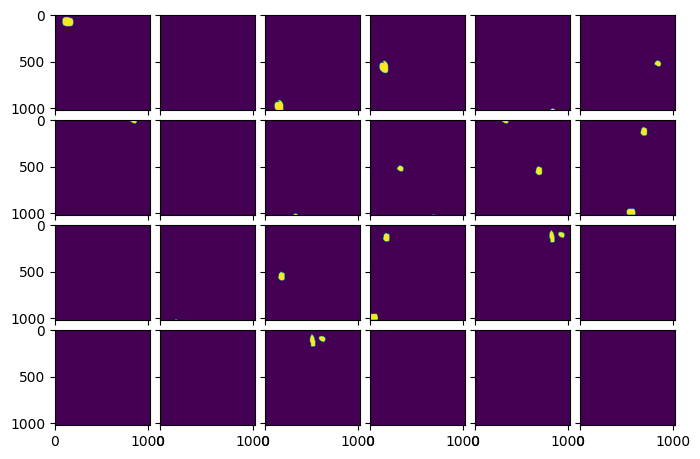

In [28]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4,6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, tile_labels):
    # Iterating over the grid returns the Axes.
    ax.imshow(im==0)

plt.show()

In [15]:
tile_id = 0
nm_base = img_path.split('/')[-1].split('.')[0]
for tile_img, tile_label in zip(tile_imgs, tile_labels):
    break 

In [18]:
out_nm = nm_base + '-' + str(tile_id).zfill(2) + '.png'

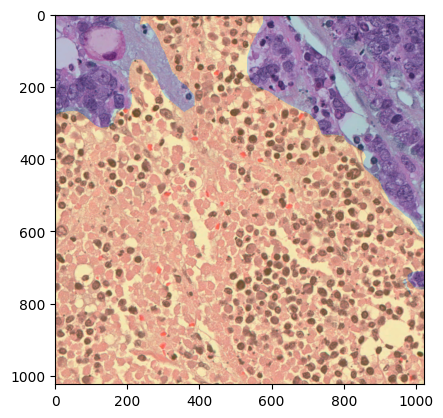

In [14]:
plt.imshow(tile_img)
plt.imshow(tile_label, alpha=0.3)